### Solving the problem of underfiting
#### reasons 
I only choose the classcical variables, sex, class, age. But losing many important information ,such as fare, family size
#### improvement
- chosse more features to solve the porblem of underfitting

In [337]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import sklearn.model_selection as model_selection
from sklearn.model_selection import learning_curve

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV



In [338]:
train_df = pd.read_csv('./input/titanic/train.csv')
test_df = pd.read_csv('./input/titanic/test.csv')
combine = [train_df, test_df]



In [291]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [339]:
for dataset in combine:
    dataset.drop(['Ticket','Cabin'], axis=1, inplace=True)

In [293]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


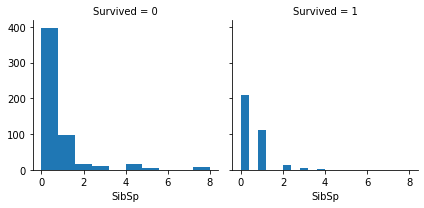

In [340]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'SibSp')

In [341]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
    dataset.drop(['SibSp','Parch'], axis=1, inplace=True)    

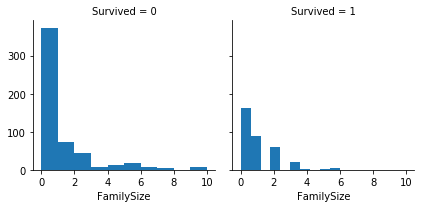

In [342]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'FamilySize')

In [343]:
for dataset in combine:
    dataset['title']=dataset.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())


newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

for dataset in combine:
    dataset['title']=dataset.title.map(newtitles)

train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,Mrs


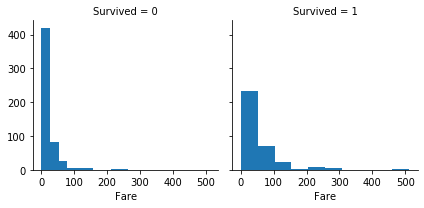

In [311]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare')
## passenger with higher fee have a higher survival

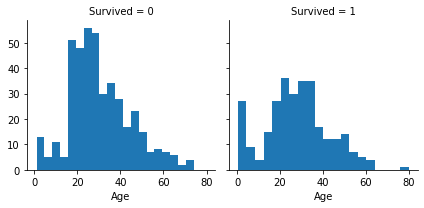

In [102]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

From the distribution above, the young between(20, 30) has a lower survival. While the older(70-80) and the infant has a higher survival. 


In [312]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,Mrs


In [344]:
train_df.groupby(['title','Sex']).Age.mean()

title    Sex   
Master   male       4.574167
Miss     female    21.804054
Mr       male      32.368090
Mrs      female    35.718182
Officer  female    49.000000
         male      46.562500
Royalty  female    40.500000
         male      42.333333
Name: Age, dtype: float64

In [345]:
def newage (cols):
    title=cols[0]
    Sex=cols[1]
    Age=cols[2]
    if pd.isnull(Age):
        if title=='Master' and Sex=="male":
            return 4.57
        elif title=='Miss' and Sex=='female':
            return 21.8
        elif title=='Mr' and Sex=='male': 
            return 32.37
        elif title=='Mrs' and Sex=='female':
            return 35.72
        elif title=='Officer' and Sex=='female':
            return 49
        elif title=='Officer' and Sex=='male':
            return 46.56
        elif title=='Royalty' and Sex=='female':
            return 40.50
        else:
            return 42.33
    else:
        return Age 

In [346]:
train_df.Age=train_df[['title','Sex','Age']].apply(newage, axis=1)
test_df.Age=test_df[['title','Sex','Age']].apply(newage, axis=1)

In [347]:
train_df.Fare=train_df.Fare.fillna(train_df.Fare.mean())
test_df.Fare=test_df.Fare.fillna(test_df.Fare.mean())
train_df.Embarked=train_df.Embarked.fillna(train_df.Embarked.mode()[0])

In [327]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
FamilySize     0
title          0
dtype: int64

### Feature extraction

In [348]:
for dataset in combine:
    dataset.drop(['Name'], axis=1, inplace= True)


In [349]:
train_df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,title
0,1,0,3,male,22.0,7.2500,S,1,Mr
1,2,1,1,female,38.0,71.2833,C,1,Mrs


In [350]:
for dataset in combine: 
    dataset.loc[dataset['Sex']=='male', 'Sex'] = 1
    dataset.loc[dataset['Sex']=='female', 'Sex'] = 2
for dataset in combine:
    dataset.loc[dataset['Embarked']=='C', 'Embarked'] = 1
    dataset.loc[dataset['Embarked']=='Q', 'Embarked'] = 2
    dataset.loc[dataset['Embarked']=='S', 'Embarked'] = 3


In [351]:
dump_train = train_df
dump_test = test_df

In [352]:
titles_map={
    "Officer":  1,
    "Royalty":   2,
    "Mrs":      3,
    "Miss":       4,
    "Mr" :      5,
    "Master" :  6}
for dataset in combine:
    dataset['title']=dataset.title.map(titles_map)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,title
0,1,0,3,1,22.0,7.2500,3,1,5
1,2,1,1,2,38.0,71.2833,1,1,3


In [353]:
train_df.shape


(891, 9)

In [357]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df
X_test.shape

(418, 8)

In [358]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(X_train, Y_train, random_state = 0)
print(train1_x.shape)
print(test1_x.shape)

(668, 8)
(223, 8)


In [359]:
X_train = train1_x
Y_train = train1_y

In [360]:
## # Support Vector Machines with  tuning the parameter by cross validation 
svc=make_pipeline(StandardScaler(),SVC(random_state=1))
r=[0.0001,0.001,0.1,1,10,50,100]
PSVM=[{'svc__C':r, 'svc__kernel':['linear']},
      {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
GSSVM=GridSearchCV(estimator=svc, param_grid=PSVM, scoring='accuracy', cv=2)
scores_svm=cross_val_score(GSSVM, X_train.astype(float), Y_train,scoring='accuracy', cv=5)

np.mean(scores_svm)

0.8233643811020087

In [361]:
model=GSSVM.fit(X_train, Y_train)

In [362]:
test1_prec=model.predict(test1_x)
test_accr = calAccuracy(test1_prec, test1_y)
print(test_accr)

0.8161434977578476


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The

[ 50 100 200 300 400]
[[0.92       0.8        0.8        0.8        0.8       ]
 [0.84       0.8        0.8        0.8        0.8       ]
 [0.89       0.85       0.89       0.89       0.89      ]
 [0.8        0.82666667 0.8        0.85       0.85      ]
 [0.8875     0.8325     0.7925     0.8525     0.87      ]]
[[0.75373134 0.79850746 0.7761194  0.78195489 0.81203008]
 [0.79104478 0.82835821 0.79104478 0.81203008 0.86466165]
 [0.78358209 0.82835821 0.76119403 0.76691729 0.81203008]
 [0.7761194  0.85074627 0.78358209 0.78195489 0.80451128]
 [0.80597015 0.82835821 0.7761194  0.78947368 0.84210526]]


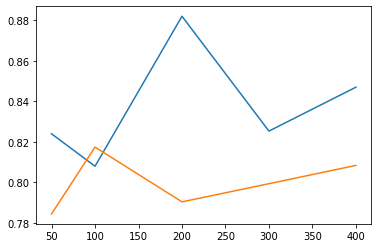

In [363]:
# plotting the learning curve
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, Y_train, train_sizes=[50, 100, 200,300,400], cv=5)
print(train_sizes)
print(train_scores)
print(valid_scores)

train_scores = train_scores.mean(axis=1)
valid_scores = valid_scores.mean(axis=1)

plt.plot(train_sizes, train_scores, label = 'Training error')
plt.plot(train_sizes, valid_scores, label = 'valid_scores error')

In [364]:
## Predict the final test data
Y_pred = model.predict(X_test)

In [235]:
def calAccuracy(Y_pred, test1_y):
    res = Y_pred == test1_y
    sum(res == False)
    sum(res == True)
    res = sum(res == True)/float(test1_y.shape[0])
    return res

In [365]:
new_test_df = pd.read_csv('./input/titanic/test.csv')
new_test_df.head(5)
new_test_df.shape
new_test_df['Age'].isnull().sum()
new_test_df.shape

(418, 11)

In [366]:
Y_pred.shape

(418,)

In [367]:
new_test_df = pd.read_csv('./input/titanic/test.csv')

In [368]:
submission = pd.DataFrame({
        "PassengerId": new_test_df["PassengerId"],
        "Survived": Y_pred
    })

In [369]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [370]:
submission.to_csv("./submit.csv", index=False)

### Conclusion 
In this part, I increase the accuracy from 78% to 79% by adding more features

### Problem, still underfitting, how to choose a better feature or combinational feature?